# <span style=" display: block; text-align: center; color: #FFFFFF; padding: 0.4em 0.5em;background: #303030;">  DTW Discrete Wavelet Transform  </span>





离散小波变换： [Discrete Wavelet Transform](https://zh.wikipedia.org/wiki/%E9%9B%A2%E6%95%A3%E5%B0%8F%E6%B3%A2%E8%AE%8A%E6%8F%9B)

# <span style="padding: 0.4em 0.5em; color: #494949; background: #f4f4f4; border-left: solid 5px #7db4e6; border-bottom: solid 3px #d7d7d7;">1. Decomposition</span>

Wavelet decomposition is a succession of filters and downsampling. 
<p/>
<img src="img/decomposition.png" width=800>
<p/>
You will code this decomposition in python step by step in the following subsections.

To help you, you will have code to fill in. Each of the following subsections will indicate which function to complete. 

To test, you will use a synthetic file you can find just below, or the famous Lena bmp file, you can easily find on the net. Make sure of taking the bmp file (not a compressed file).

<img src="img/imsynth.bmp" width=64>

Now you have everything to start!

In [1]:
import cv2 # install opencv-python
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy


img = cv2.imread('img/imsynth.bmp',cv2.IMREAD_GRAYSCALE) # read the image
#img = cv2.imread('img/Lena.bmp',cv2.IMREAD_GRAYSCALE) # read the image
print("")
print("The image is " + str(len(img[0])) + " pixels wide and " + str(len(img)) + " pixels high.")


The image is 64 pixels wide and 64 pixels high.


## <span style="border-bottom: double 5px #7db4e6; color: #494949;">1.1. Filtering in one direction</span>

One of the basic tool is filtering. In wavelet decomposition, it is done in one direction (x axis) and then in the other direction (y axis).

Let's first create a generic function for filtering in one direction (x axis). <b>img</b> is the image you want to filter and <b>kernel</b> is a vector with the weights of the filter.

You need to fill in the code:

In [2]:
#-------------------------------
# FUNCTIONS
#-------------------------------
# 1.1 Convolution in one direction
def convOneDirection (img, kernel) :
    h = len(kernel)//2
    img_conv = np.zeros(img.shape)
    for i in range (0, len(img)):
        for j in range(h, len(img[0])-h):
            sum = 0
            for m in range(len(kernel)):
                sum = sum+kernel[m]*img[i][j-h+m]
            img_conv[i][j] = sum
    return img_conv


<div id="back_1">
   <a href="#sol_1">Go to one solution.</a>
</div>


Verify this function on an image with a low-pass filter kernel ([-1 2 6 2 -1]) and with a high-pass filter kernel ([-4 8 -4]) for instance.


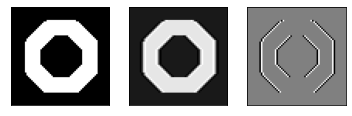

In [3]:
#-------------------------------
# 1.1 FILTRERING IN ONE DIRECTION
#-------------------------------
print("")
img_comp_lowpassfilter = convOneDirection (img, [-1, 2, 6, 2, -1]) 
img_comp_highpassfilter = convOneDirection (img, [-2, 4, -2]) 
plt.subplot(1,3,1),plt.imshow(img, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img_comp_lowpassfilter, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img_comp_highpassfilter, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.show()

For filtering in the other direction, instead of having another function (or add a parameter to this function), we will use a trick: mirror the matrix. If you mirror the matrix, do a convolution on x axis and mirror the matrix again, you have performed a convolution in the y axis direction. The mirror function is given later and is named mirrorMatrix. Note that this take time processing to do so ; in real life, we won't do so ;).

## <span style="border-bottom: double 5px #7db4e6; color: #494949;">1.2. Downsample in one direction</span>

The second tool for DWT is downsampling by 2. 

Downsampling will start form the first pixel after a low pass filter, and from the second pixel after a high pass filter. The generic function takes the information of the first pixel to start with (either 0 or 1).

Fill in the code:

In [5]:
# 1.2 Downsampling in one direction
def downsamplOneDirection(img,firstPoint): 
    img_downsampl = np.zeros((len(img), len(img[0])//2))
    for i in range (0, len(img)):
        for j in range (0, len(img[0])//2):
            img_downsampl[i][j] = img[i][2*j+firstPoint]
    return img_downsampl

<div id="back_2">
   <a href="#sol_2">Go to one solution.</a>
</div>

Test it with the Le Gall kernel wavelet to get this result:

<img src="img/im2.png" width=400>

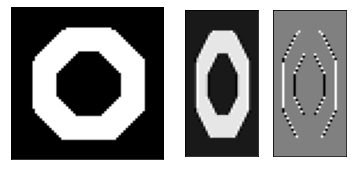

In [6]:
#-------------------------------
# 1.2 DOWNSAMPLE IN ONE DIRECTION
#-------------------------------
print("")
img_comp_lowpassfilter = convOneDirection (img, [-1, 2, 6, 2, -1]) 
img_comp_highpassfilter = convOneDirection (img, [-2, 4, -2]) 
img_comp_lowpassfilter = downsamplOneDirection (img_comp_lowpassfilter, 0) 
img_comp_highpassfilter = downsamplOneDirection (img_comp_highpassfilter, 1) 
plt.subplot(1,2,1),plt.imshow(img, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(1,4,3),plt.imshow(img_comp_lowpassfilter, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(1,4,4),plt.imshow(img_comp_highpassfilter, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.show()

For downsampling in the other direction, we will use the same trick as for convolution: mirror the matrix. The same mirror function named mirrorMatrix can be used.

## <span style="border-bottom: double 5px #7db4e6; color: #494949;">1.3. Decomposition</span>

The whole decomposition is made of convolutions and downsampling on both axis. We need one more function to miror a matrix (swap x and y axes).
Understand the following function:

In [7]:
# 1.3 Mirror the matrix
def mirrorMatrix(img):
    img_miror = np.zeros((len(img[0]), len(img)))
    for i in range (0, len(img[0])):
        for j in range(0, len(img)):
            img_miror[i][j] = img[j][i]
    return img_miror

And complete the whole decomposition:


Image with max amplitude : 255
Starting decomposition...
Decommposition finished
Max amplitude of integer images are : 255 2295.0 1020.0 19380.0 10200.0 10200.0 12240.0
The images are 32 pixels wide and 32 pixels high.


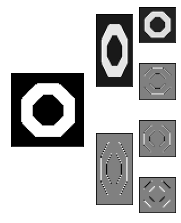

In [8]:
#-------------------------------
# 1.3 DECOMPOSITION
#-------------------------------
# Decomposition
print("")
print("Image with max amplitude : " + str(np.max(img)))
print("Starting decomposition...")
coefMult = 8 # to keep integer for computation
kernelL = [-1, 2, 6, 2, -1] # coefMult*[-1, 2, 6, 2, -1]/8
kernelH = [-4, 8, -4] # coefMult*[-1, 2, -1]/2
firstPointL = 0 # first pixel for low pass filters
firstPointH = 1 # second pixel for high pass filters

imgL = downsamplOneDirection(convOneDirection(img, kernelL), firstPointL) # LossPass Filter on width + downsample by 2
imgLcopy = mirrorMatrix(deepcopy(imgL))
imgLL = mirrorMatrix(downsamplOneDirection(convOneDirection(imgLcopy, kernelL), firstPointL)) # LossPass Filter on height + downsample by 2
imgLH = mirrorMatrix(downsamplOneDirection(convOneDirection(imgLcopy, kernelH), firstPointH)) # HighPass Filter on height + downsample by 2
imgH = downsamplOneDirection(convOneDirection(img, kernelH), firstPointH) # LossPass Filter on width + downsample by 2
imgHcopy = mirrorMatrix(deepcopy(imgH))
imgHL = mirrorMatrix(downsamplOneDirection(convOneDirection(imgHcopy, kernelL), firstPointL)) # LossPass Filter on height + downsample by 2
imgHH = mirrorMatrix(downsamplOneDirection(convOneDirection(imgHcopy, kernelH), firstPointH)) # HighPass Filter on height + downsample by 2

print("Decommposition finished")
print("Max amplitude of integer images are : " + str(np.max(img)) + " " + str(np.max(imgL))+ " " + str(np.max(imgH))+ " " + str(np.max(imgLL))+ " " + str(np.max(imgLH))+ " " + str(np.max(imgHL))+ " " + str(np.max(imgHH)))
print("The images are " + str(len(imgLL[0])) + " pixels wide and " + str(len(imgLL)) + " pixels high.")

# Verify by plotting the different images:
plt.subplot(1,4,1),plt.imshow(img, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(2,8,3),plt.imshow(imgL, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(2,8,11),plt.imshow(imgH, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(4,8,4),plt.imshow(imgLL, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(4,8,12),plt.imshow(imgLH, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(4,8,20),plt.imshow(imgHL, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(4,8,28),plt.imshow(imgHH, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.show()

<div id="back_3">
   <a href="#sol_3">Go to one solution.</a>
</div>

# <span style="padding: 0.4em 0.5em; color: #494949; background: #f4f4f4; border-left: solid 5px #7db4e6; border-bottom: solid 3px #d7d7d7;">2. Reconstruction & Verification</span>

Reconstruction is the opposite process:
    <p/>
<img src="img/reconstruction.png" width=800>
<p/>

## <span style="border-bottom: double 5px #7db4e6; color: #494949;">2.1. Reconstruction</span>

The function for upsampling is the following one:

In [9]:
# 2.1 Upsampling in one direction
def upsamplOneDirection(img,firstPoint): 
    img_upsubsampl = np.zeros((len(img), len(img[0])*2))
    for i in range (0, len(img)):
        for j in range (0, len(img[0])):
            img_upsubsampl[i][j*2+firstPoint] = img[i][j]
    return img_upsubsampl

Complete the code of reconstruction:


Starting recontruction...
Reconstruction finished
Max amplitude of integer images are : 155040.0 61200.0 81600.0 73440.0 146880.0 65280.0 1175040.0 391680.0 1044480.0
The image is 64 pixels wide and 64 pixels high.


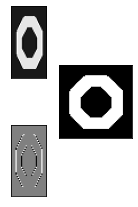

In [10]:
#-------------------------------
# 2.1 RECONSTRUCTION
#-------------------------------
# Reconstruction
print("")
print("Starting recontruction...")
kernelH = [-1, -2, 6, -2, -1] # coefMult*[-1, -2, 6, -2, -1]/8
kernelL = [4, 8, 4] # coefMult*[1, 2, 1]/2
irstPointL = 0 # first pixel for low pass filters
firstPointH = 1 # second pixel for high pass filters

imgRL1 = convOneDirection(upsamplOneDirection(mirrorMatrix(imgLL),firstPointL), kernelL)
imgRL2 = convOneDirection(upsamplOneDirection(mirrorMatrix(imgLH),firstPointH), kernelH)
imgRL = mirrorMatrix(imgRL1+imgRL2) # 直接相加
imgRH1 = convOneDirection(upsamplOneDirection(mirrorMatrix(imgHL),firstPointL), kernelL) 
imgRH2 = convOneDirection(upsamplOneDirection(mirrorMatrix(imgHH),firstPointH), kernelH) 
imgRH = mirrorMatrix(imgRH1+imgRH2)
imgR1 = convOneDirection(upsamplOneDirection(imgRL,firstPointL), kernelL)
imgR2 = convOneDirection(upsamplOneDirection(imgRH,firstPointH), kernelH)
imgR = imgR1 + imgR2

plt.subplot(2, 8, 6),plt.imshow(imgRL, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 8, 14),plt.imshow(imgRH, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 4, 4),plt.imshow(imgR, cmap = 'gray'), plt.xticks([]), plt.yticks([])
print("Reconstruction finished")
print("Max amplitude of integer images are : " + str(np.max(imgRL1)) + " " + str(np.max(imgRL2))+ " " + str(np.max(imgRH1))+ " " + str(np.max(imgRH2))+ " " + str(np.max(imgRL))+ " " + str(np.max(imgRH))+ " " + str(np.max(imgR1))+ " " + str(np.max(imgR2))+ " " + str(np.max(imgR)))
print("The image is " + str(len(imgR[0])) + " pixels wide and " + str(len(imgR)) + " pixels high.")
plt.show()

<div id="back_4">
   <a href="#sol_4">Go to one solution.</a>
</div>

## <span style="border-bottom: double 5px #7db4e6; color: #494949;">2.2. Verification</span>

On several images (imsynth.bmp, Lena.bmp, ...), verify that the image reconstructed is the same as the original image. **Do not take into account the edges of the image (because we did not perform the convolution on those parts)**.

You can fill in the code:


Starting verification...
Mask delta value : 0.0


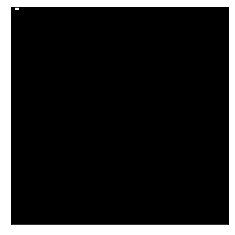

In [12]:
#-------------------------------
# 2.2 VERIFICATION
#-------------------------------
imgRCoef = imgR//coefMult**4 # coefMult**4 is due to the fact that we keep integers before - see kernel values
print("")
print("Starting verification...")
edge = 3
maskVerif = np.abs((img-imgRCoef)[edge:len(img)-edge, edge:len(img[0])-edge]) # difference between the 2 images, without the edges 
print("Mask delta value : " + str(np.max(maskVerif)) )
maskVerif[0][0] = 0; maskVerif[0][1] = 255 # to avoid min-max equalization from matplotlib :)
plt.imshow(maskVerif, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.show()

<div id="back_5">
   <a href="#sol_5">Go to one solution.</a>
</div>

The mask delta value should be 0 ! And you should have a black image (expect the 2nd pixel because... matplotlib... you know the story).

# <span style=" display: block; text-align: center; color: #FFFFFF; padding: 0.4em 0.5em;background: #303030;">  Solutions </span>

<div id="sol_1"/>


# 1.1 Convolution in one direction

In [3]:
# Convolution in one direction
def convOneDirection (img, kernel) :
    h = len(kernel)//2
    img_conv = np.zeros(img.shape)
    for i in range (0, len(img)):
        for j in range(h, len(img[0])-h):
            sum=0
            for m in range(len(kernel)):
                sum=sum+kernel[m]*img[i][j-h+m]
            img_conv[i][j] = sum
    return img_conv


   <a href="#back_1">Back.</a>


<div id="sol_2"/>

# 1.2 Downsampling in one direction

In [6]:
# Downsampling in one direction
def downsamplOneDirection(img,firstPoint): 
    img_downsampl = np.zeros((len(img), len(img[0])//2))
    for i in range (0, len(img)):
        for j in range (0, len(img[0])//2):
            img_downsampl[i][j] = img[i][2*j+firstPoint]
    return img_downsampl

   <a href="#back_2">Back.</a>

<div id="sol_3"/>

# 1.3 Decomposition


Image with max amplitude : 255
Starting decomposition...
Decommposition finished
Max amplitude of integer images are : 255 2295.0 1020.0 19380.0 10200.0 10200.0 12240.0
The images are 32 pixels wide and 32 pixels high.


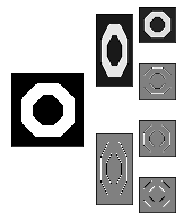

In [10]:
#-------------------------------
# DECOMPOSITION
#-------------------------------
# Decomposition
print("")
print("Image with max amplitude : " + str(np.max(img)))
print("Starting decomposition...")
coefMult = 8 # to keep integer for computation
kernelL = [-1, 2, 6, 2, -1] # coefMult*[-1, 2, 6, 2, -1]/8
kernelH = [-4, 8, -4] # coefMult*[-1, 2, -1]/2
firstPointL = 0 # first pixel for low pass filters
firstPointH = 1 # second pixel for high pass filters

imgL = downsamplOneDirection(convOneDirection(img, kernelL), firstPointL) # LossPass Filter on width + downsample by 2
imgLcopy = mirrorMatrix(deepcopy(imgL))
imgLL = mirrorMatrix(downsamplOneDirection(convOneDirection(imgLcopy, kernelL), firstPointL)) # LossPass Filter on height + downsample by 2
imgLH = mirrorMatrix(downsamplOneDirection(convOneDirection(imgLcopy, kernelH), firstPointH)) # HighPass Filter on height + downsample by 2
imgH = downsamplOneDirection(convOneDirection(img, kernelH), firstPointH) # LossPass Filter on width + downsample by 2
imgHcopy = mirrorMatrix(deepcopy(imgH))
imgHL = mirrorMatrix(downsamplOneDirection(convOneDirection(imgHcopy, kernelL), firstPointL)) # LossPass Filter on height + downsample by 2
imgHH = mirrorMatrix(downsamplOneDirection(convOneDirection(imgHcopy, kernelH), firstPointH)) # HighPass Filter on height + downsample by 2

print("Decommposition finished")
print("Max amplitude of integer images are : " + str(np.max(img)) + " " + str(np.max(imgL))+ " " + str(np.max(imgH))+ " " + str(np.max(imgLL))+ " " + str(np.max(imgLH))+ " " + str(np.max(imgHL))+ " " + str(np.max(imgHH)))
print("The images are " + str(len(imgLL[0])) + " pixels wide and " + str(len(imgLL)) + " pixels high.")

# Verify by plotting the different images:
plt.subplot(1,4,1),plt.imshow(img, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(2,8,3),plt.imshow(imgL, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(2,8,11),plt.imshow(imgH, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(4,8,4),plt.imshow(imgLL, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(4,8,12),plt.imshow(imgLH, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(4,8,20),plt.imshow(imgHL, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(4,8,28),plt.imshow(imgHH, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.show()

   <a href="#back_3">Back.</a>

<div id="sol_4"/>

# 2.1 Reconstruction


Starting recontruction...
Reconstruction finished
Max amplitude of integer images are : 155040.0 61200.0 81600.0 73440.0 146880.0 65280.0 1175040.0 391680.0 1044480.0
The image is 64 pixels wide and 64 pixels high.


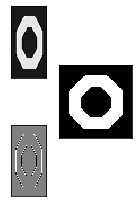

In [13]:
#-------------------------------
# RECONSTRUCTION
#-------------------------------
# Reconstruction
print("")
print("Starting recontruction...")
kernelH = [-1, -2, 6, -2, -1] # coefMult*[-1, -2, 6, -2, -1]/8
kernelL = [4, 8, 4] # coefMult*[1, 2, 1]/2
irstPointL = 0 # first pixel for low pass filters
firstPointH = 1 # second pixel for high pass filters

imgRL1 = convOneDirection(upsamplOneDirection(mirrorMatrix(imgLL),firstPointL), kernelL)
imgRL2 = convOneDirection(upsamplOneDirection(mirrorMatrix(imgLH),firstPointH), kernelH)
imgRL = mirrorMatrix(imgRL1+imgRL2)
imgRH1 = convOneDirection(upsamplOneDirection(mirrorMatrix(imgHL),firstPointL), kernelL) 
imgRH2 = convOneDirection(upsamplOneDirection(mirrorMatrix(imgHH),firstPointH), kernelH) 
imgRH = mirrorMatrix(imgRH1+imgRH2)
imgR1 = convOneDirection(upsamplOneDirection(imgRL,firstPointL), kernelL)
imgR2 = convOneDirection(upsamplOneDirection(imgRH,firstPointH), kernelH)
imgR = imgR1 + imgR2
plt.subplot(2, 8, 6),plt.imshow(imgRL, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 8, 14),plt.imshow(imgRH, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 4, 4),plt.imshow(imgR, cmap = 'gray'), plt.xticks([]), plt.yticks([])
print("Reconstruction finished")
print("Max amplitude of integer images are : " + str(np.max(imgRL1)) + " " + str(np.max(imgRL2))+ " " + str(np.max(imgRH1))+ " " + str(np.max(imgRH2))+ " " + str(np.max(imgRL))+ " " + str(np.max(imgRH))+ " " + str(np.max(imgR1))+ " " + str(np.max(imgR2))+ " " + str(np.max(imgR)))
print("The image is " + str(len(imgR[0])) + " pixels wide and " + str(len(imgR)) + " pixels high.")
plt.show()

   <a href="#back_4">Back.</a>

<div id="sol_5"/>

# 2.2 Verification


Starting verification...
Mask delta value : 0.0


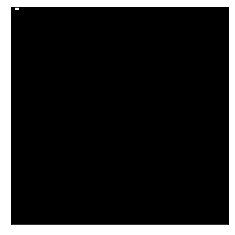

In [15]:
#-------------------------------
# VERIFICATION
#-------------------------------
imgRCoef = imgR//coefMult**4 # coefMult**4 is due to the fact that we keep integers before - see kernel values
print("")
print("Starting verification...")
edge = 3
maskVerif = np.abs((img-imgRCoef)[edge:len(img)-edge, edge:len(img[0])-edge]) # difference between the 2 images, without the edges 
print("Mask delta value : " + str(np.max(maskVerif)) )
maskVerif[0][0] = 0; maskVerif[0][1] = 255 # to avoid min-max equalization from matplotlib :)
plt.imshow(maskVerif, cmap = 'gray'), plt.xticks([]), plt.yticks([])
plt.show()

   <a href="#back_5">Back.</a>